H

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Path to modules

In [2]:
import sys
sys.path.insert(0, '/Users/khhuisman/Documents/Jupyter_notebooks/Github_Coulomb_Paper/Modules_Coulomb_Github')


# sys.path.insert(0, '<path_to_modules>')

# Chiral Scattering Region

In [3]:
import ChiralChainModel_git

# Import NEGF methods

In [4]:
import negf_HIA_git

In [5]:
import Integration_HIA_Trapz_git

# Defining Hamiltonian, Leads

In [13]:
Lm = 8             #number of sites 
chirality = True   #handedness of molecule 
N = Lm             # Number of sites within one winding
M = 1              # Number of windings
a = 1              # radius of helix
c = 1              # pitch of helix


epsilon = 0 # onsite energy
t = 2.4     # hopping paramter

# List of Spin-Orbit Coupling parameter
lambdalist = [(1*(10**-1))*t,(1*(10**-3))*t]
# List of interaction strength
Ulist = [ 2*t,0.5*t] 


#Gamma Matrix
kmax  = 4      # Number spin up + down sites coupled to each lead
gamma = 0.5    # coupling strength
pz    = 0.5    # magnetic polarization

pz_P = abs(pz)
pz_M = -abs(pz)


T = 300 # Kelvin Temperature of leads
betaL,betaR = negf_HIA_git.func_beta(T), negf_HIA_git.func_beta(T) # 1/ElectronVolt

# Zero Bias

In [14]:
Vmax = 0
V_list_total = [0]

# Energies

In [15]:
def func_energies(Hamiltonian0,U,npoints):
    '''
    Input:
    Hamiltonian0 = molecule without interaction (U=0)
    U = interaction strength
    npoints = number of energy points in window [emin,emax]
    Output:
    emax = upper bound of intergral
    emin = lowest eigenvalue of Hamiltonian0
    energiesreal = list of energies between [emin-1000,emax] (make sure the emax < ef +Vmax/2)
    eflist = list of fermi energies for which to calculate electron densities.
    '''
    evlist = np.linalg.eigh(Hamiltonian0)[0]
    e_lumo = evlist[int(Hamiltonian0.shape[0]/2)-1]
    e_homo = evlist[int(Hamiltonian0.shape[0]/2)]
    #Fermi Energy
    hl_gap = e_lumo - e_homo
    
    
    
    #lower,upper bound for Glesser function
    emin = np.round(int(10*min(evlist))/10 - 10,2) #lower bound for integrals
    emax = np.round(int(10*max(evlist))/10 + 10,2)   #lower bound for integrals
    
    
    energies_zero4000 = np.linspace(emin-1000,emin,4000)
   
    energiesreal_prime = np.linspace(emin,emax,npoints)
    
    energiesreal = Integration_HIA_Trapz_git.jointwolist(energies_zero4000,energiesreal_prime)
    
    
    

#     eflist = [U/2 + abs(np.round( 0  + kappa*hl_gap/2,11)) for kappa in [0.25] ]

    eflist = [ U/2 ,U/2 + 0.5,U/2 + 1  ]
    
    return emin,emax,npoints,energiesreal,eflist

### Electron Density: Self-Consistent Calculation


In [16]:
tol = 10**-3
max_iteration = 50

npoints = 3000

In [17]:
U = Ulist[0]
lambda1 = lambdalist[0]

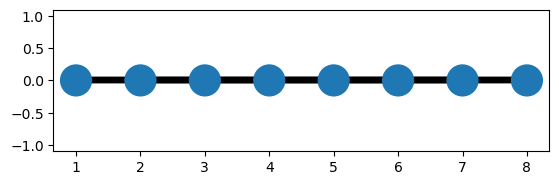

--- V = 0 ---
[0.    0.    0.    0.    0.    0.001 0.    0.001 0.    0.001 0.    0.001
 0.    0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0 ---
[0.    0.    0.    0.    0.001 0.    0.001 0.    0.001 0.    0.001 0.
 0.    0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0 ---
[0.    0.    0.    0.    0.    0.001 0.    0.001 0.    0.001 0.    0.001
 0.    0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0 ---
[0.    0.    0.    0.    0.001 0.    0.001 0.    0.001 0.    0.001 0.
 0.    0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--- V = 0 ---
[0.004 0.002 0.007 0.004 0.006 0.005 0.007 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.003 0.003]
[0.001 0.002 0.001 0.002 0.    0.001 0.    0.001 0.    0.001 0.    0.
 0.001 0.001 0.001 0.001]
[0.001 0.    0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.001 0.    0.001 0.001]
[0.    0.001 0.    0.    0.    0.    0.    0.    

In [20]:
total_list = []

GammaR,GammaLP,GammaLM,Hamiltonian0,hamiltonian_shape= ChiralChainModel_git.system_hamiltonian0(Lm,
                                                                                    epsilon,t, 
                                                                              lambda1,chirality,
                                                                              a,c,M,N,
                                                                                kmax,gamma,abs(pz)
                                                                            )


emin,emax,npoints,energiesreal,eflist = func_energies(Hamiltonian0,U,npoints)

for i in range(len(eflist)):
    ef = eflist[i]

    n_list_totalP,convglistP = Integration_HIA_Trapz_git.self_consistent_trapz(V_list_total,Vmax,
                                      max_iteration,
                            ef,
                                    U,
                                    Hamiltonian0,
                                    GammaLP,GammaR, 
                                    betaL, betaR,tol,energiesreal)


    n_list_totalM,convglistM = Integration_HIA_Trapz_git.self_consistent_trapz(V_list_total,Vmax, 
                                  max_iteration,
                        ef,
                                U,
                                Hamiltonian0,
                                GammaLM,GammaR, 
                                betaL, betaR,tol,energiesreal)




    V_list_convg,nP_list_convg,nM_list_convg =  Integration_HIA_Trapz_git.converged_lists(V_list_total,
                                                              n_list_totalP ,convglistP,
                                                              n_list_totalM, convglistM
                                                                )
    
    total_list.append( [V_list_convg,nP_list_convg,nM_list_convg])

    


    




# Electron Density: Analysis

Electron Densities at $V=0$ satisfy time reversal symmetry $n_{is}(m,V=0) - n_{i\bar{s}}(-m,V=0)$

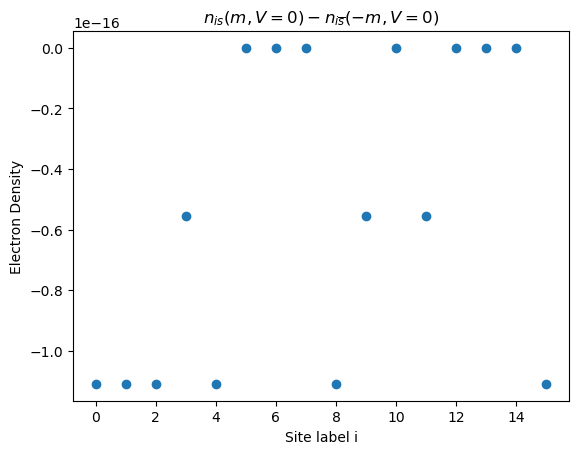

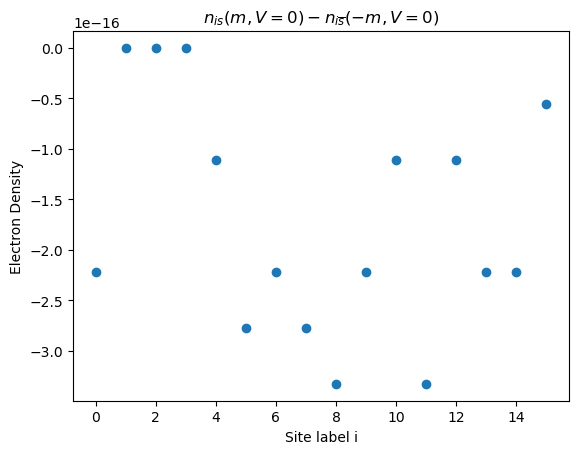

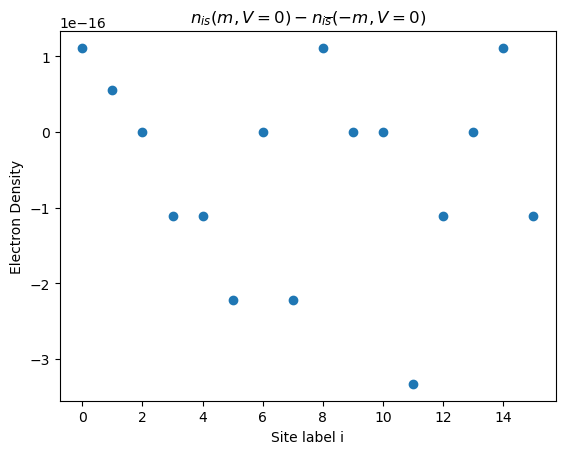

In [60]:

for i in range(len(eflist)):
    V_list_convg,nP_list_convg,nM_list_convg = total_list[i]
    
    nMlist0 = nM_list_convg[0]
    nPlist0 = nP_list_convg[0]
    ilist = [i for i in range(len(nPlist0))]
    
    
    n_convgM_swap = negf_HIA_git.pairwise_swap(nMlist0)
       
    plt.title('$n_{is}(m,V=0) - n_{i \overline{s}}(-m,V=0)$')
    plt.scatter(ilist ,
             np.subtract(nPlist0,n_convgM_swap)
            )
    
    plt.xlabel('Site label i')
    plt.ylabel('Electron Density')


    plt.show()

# $T_{LR}(m,V=0)-T_{LR}(-m,V=0) = 0$

From $T_{LR}(m,V=0)-T_{LR}(-m,V=0) = 0$ it follows that the linear conductance $G_1(m) = G_1(-m)$.

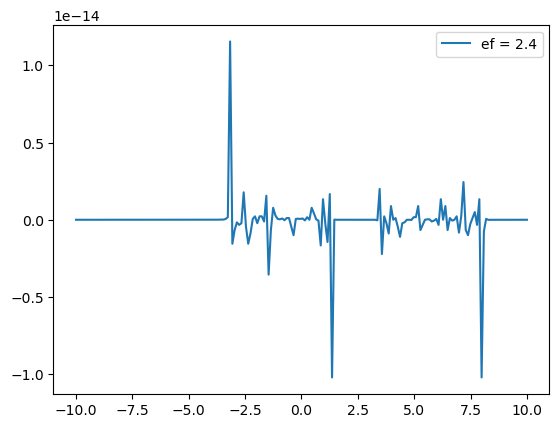

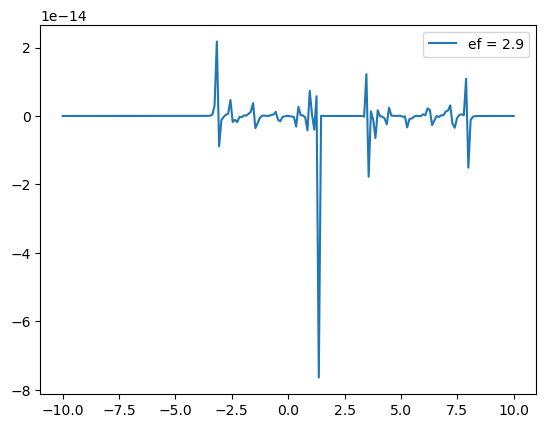

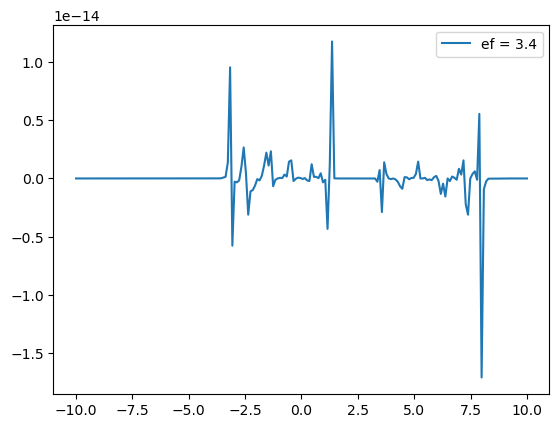

In [51]:
energies = np.linspace(-10,10,200)

for i in range(len(eflist)):
    ef = eflist[i]
    V_list_convg,nP_list_convg,nM_list_convg = total_list[i]
    
    nPlist0 = nP_list_convg[0]
    nMlist0 = nM_list_convg[0]
    dT_list = [ negf_HIA_git.TLR(energy,Hamiltonian0,GammaLP,GammaR,U,nPlist0) \
               - negf_HIA_git.TLR(energy,Hamiltonian0,GammaLM,GammaR,U,nMlist0)  for energy in energies ]

    
    plt.plot(energies,dT_list,label = 'ef = {}'.format(ef))
    plt.legend()
    plt.show()